In [1]:
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import numpy as np

In [4]:
import statsmodels.api as sm

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("results/data.csv")

In [18]:
from sklearn.metrics import r2_score

# Describing the dataset

In [8]:
df.head()


,Name,GCcontent,IntergenomicGC,GC3content,PhePer,LeuPer,MetPer,ValPer,SerPer,IsoPer,...,HisPer,GlnPer,AsnPer,LysPer,AspPer,GluPer,CysPer,TrpPer,ArgPer,GlyPer
0,AE015928.embl,42.837178,33.137506,44.995843,4.553750,8.998848,2.706563,6.273998,6.291162,6.872920,...,1.814731,3.491401,5.242501,6.665882,5.522900,6.495526,1.220568,1.363334,4.541024,6.753895
1,AE017282.embl,63.584573,59.946005,80.068804,3.785232,10.869455,2.097026,7.354318,5.231586,4.748995,...,2.319966,3.209753,2.584230,3.226282,5.390185,6.273127,1.093157,1.395600,7.828999,8.475614
2,AE014184.embl,46.331997,44.706760,42.483120,4.200996,10.310409,1.796514,8.024214,7.897662,6.710253,...,2.072897,3.081181,3.564481,4.736119,5.243077,4.989973,1.338370,1.017672,6.275019,7.338130
3,AE000657.embl,43.476167,37.096560,48.082882,5.129248,10.565127,1.871550,7.942518,4.773373,7.308979,...,1.545571,2.037278,3.586987,9.379671,4.304736,9.608507,0.790269,0.933860,4.908067,6.736166


In [9]:
df.describe()

,GCcontent,IntergenomicGC,GC3content,PhePer,LeuPer,MetPer,ValPer,SerPer,IsoPer,ProPer,...,HisPer,GlnPer,AsnPer,LysPer,AspPer,GluPer,CysPer,TrpPer,ArgPer,GlyPer
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,49.057479,43.721708,53.907662,4.417306,10.185960,2.117913,7.398762,6.048446,6.410286,4.435775,...,1.938291,2.954903,3.744550,6.001989,5.115225,6.841783,1.110591,1.177617,5.888277,7.325951
std,9.803195,11.833794,17.590472,0.569147,0.823743,0.412689,0.807038,1.387033,1.136009,0.691819,...,0.333312,0.635285,1.102641,2.655590,0.552280,1.960206,0.235859,0.235943,1.493528,0.815878
min,42.837178,33.137506,42.483120,3.785232,8.998848,1.796514,6.273998,4.773373,4.748995,3.772227,...,1.545571,2.037278,2.584230,3.226282,4.304736,4.989973,0.790269,0.933860,4.541024,6.736166
25%,43.316420,36.106796,44.367662,4.097055,9.982519,1.852791,7.084238,5.117033,6.219938,3.990051,...,1.747441,2.820205,3.319419,4.358660,5.008492,5.952339,1.017435,0.996719,4.816307,6.749462
50%,44.904082,40.901660,46.539362,4.377373,10.437768,1.984288,7.648418,5.761374,6.791586,4.308699,...,1.943814,3.145467,3.575734,5.701001,5.316631,6.384326,1.156862,1.190503,5.591543,7.046012
75%,50.645141,48.516571,56.079362,4.697624,10.641209,2.249411,7.962942,6.692787,6.981934,4.754424,...,2.134664,3.280165,4.000866,7.344330,5.423364,7.273771,1.250019,1.371400,6.663514,7.622501
max,63.584573,59.946005,80.068804,5.129248,10.869455,2.706563,8.024214,7.897662,7.308979,5.353476,...,2.319966,3.491401,5.242501,9.379671,5.522900,9.608507,1.338370,1.395600,7.828999,8.475614


# Correlation Matrix

In [10]:
correlationmatrix = df.corr()

<Figure size 432x288 with 0 Axes>

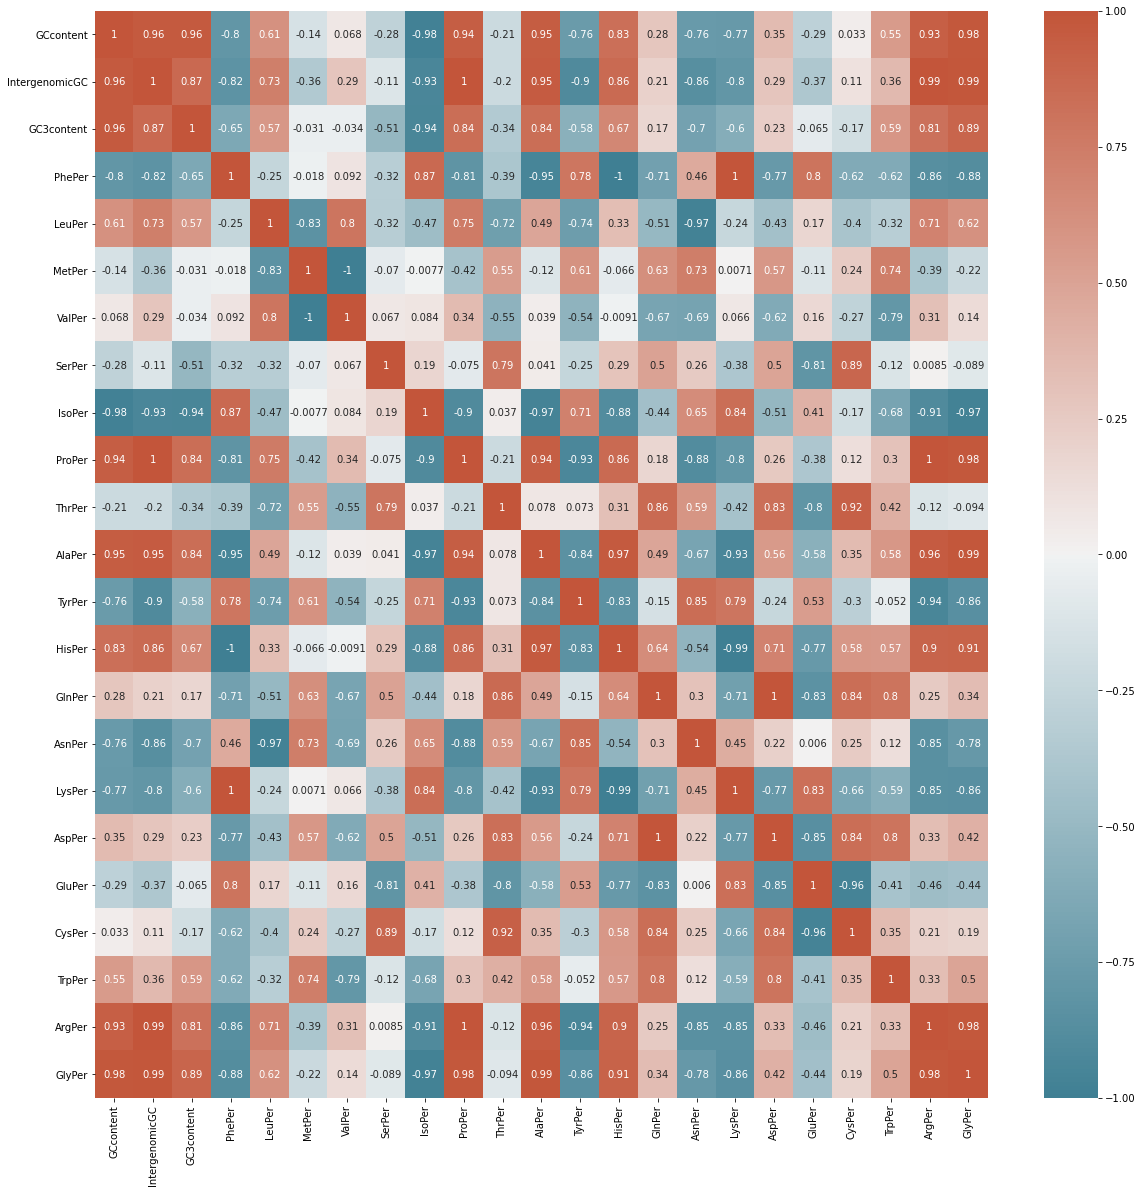

In [11]:
plt.tight_layout()
palette = sn.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(20, 20))
hm = sn.heatmap(correlationmatrix, annot=True, vmin=-1, vmax=1, cmap=palette)

In [12]:
hm.get_figure().savefig("results/Correlation.pdf")  # Saves it to the results folder

# Aminoacids

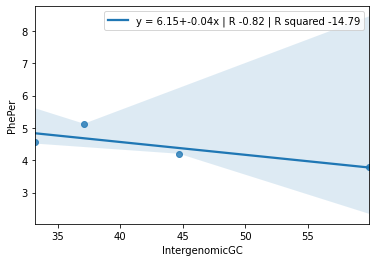

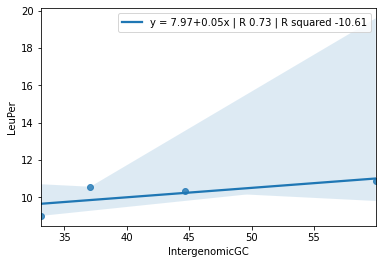

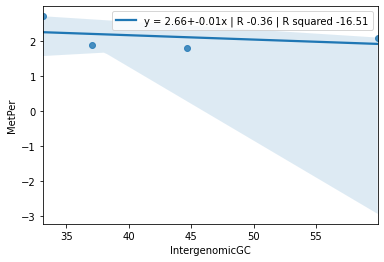

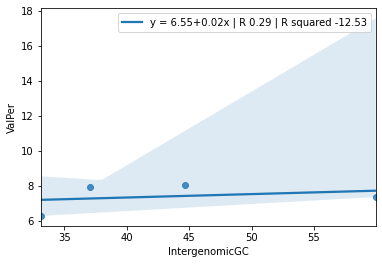

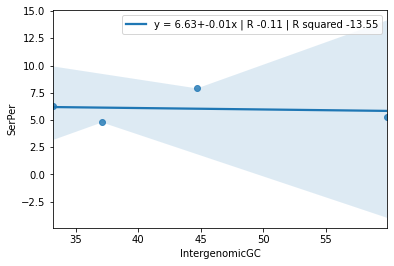

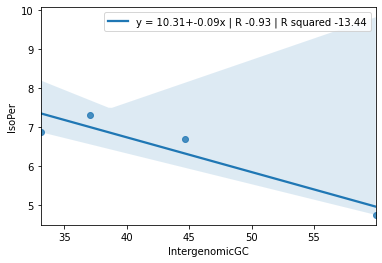

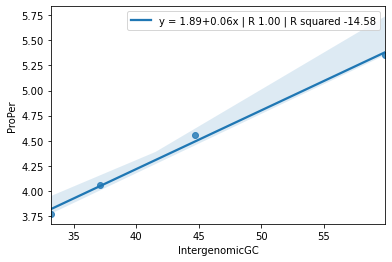

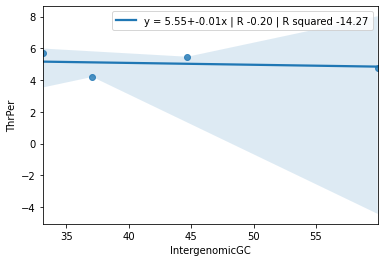

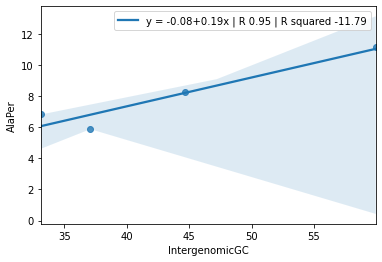

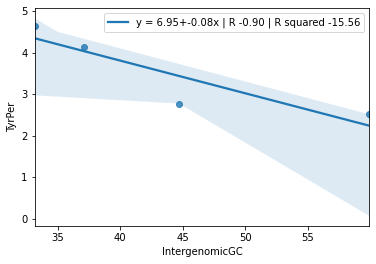

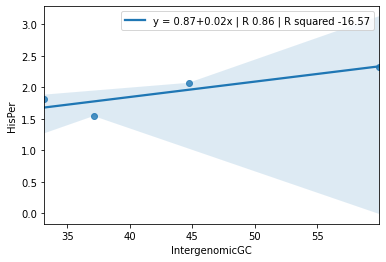

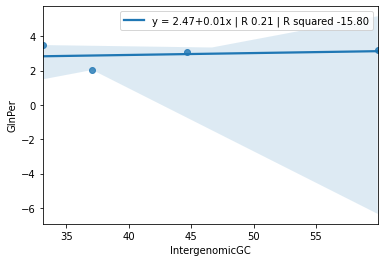

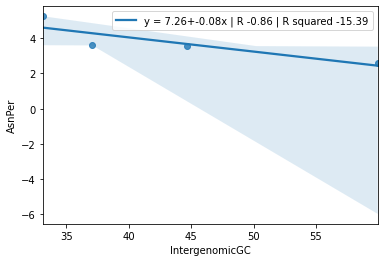

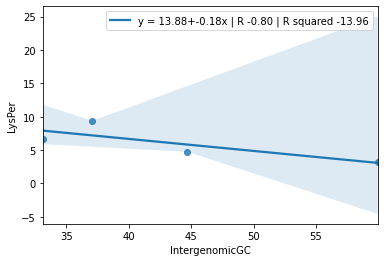

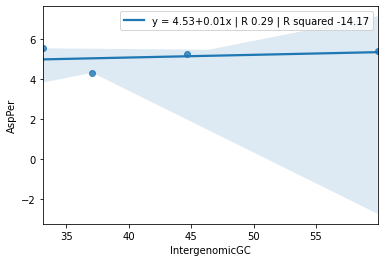

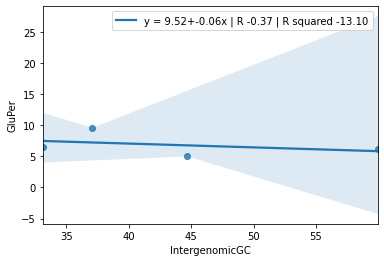

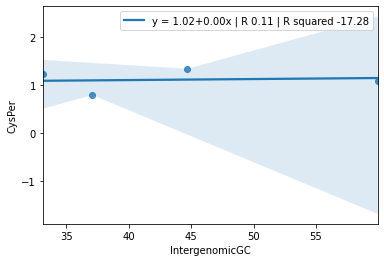

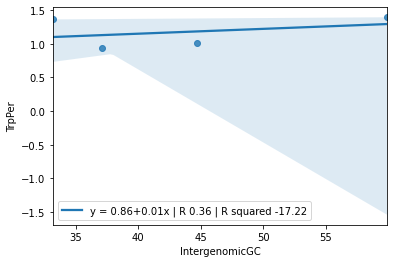

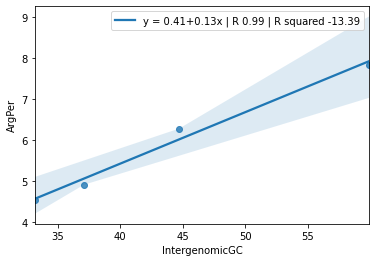

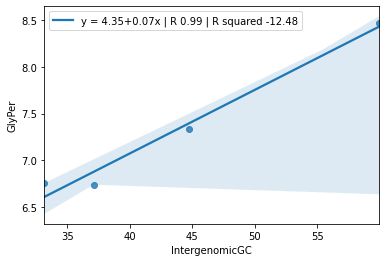

In [33]:
aminoacids = [
			"PhePer",
			"LeuPer",
			"MetPer",
			"ValPer",
			"SerPer",
			"IsoPer",
			"ProPer",
			"ThrPer",
			"AlaPer",
			"TyrPer",
			"HisPer",
			"GlnPer",
			"AsnPer",
			"LysPer",
			"AspPer",
			"GluPer",
			"CysPer",
			"TrpPer",
			"ArgPer",
			"GlyPer"
			]
x = df["IntergenomicGC"]
for aminoacid in aminoacids:
    y = df[aminoacid]    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    R_square = r2_score(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.2f} | R squared {3:.2f}".format(intercept, slope, r_value,R_square)})
    plt.legend()
    plt.show()
    plt.close("all")